In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
classifier = Sequential()

In [3]:

classifier.add(Convolution2D(32, 3, 3, input_shape= (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


classifier.add(Flatten())


classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))


In [4]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
training_set = train_datagen.flow_from_directory('cell_images/train',
                                                target_size = (64, 64),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 22046 images belonging to 2 classes.


In [7]:
test_set = test_datagen.flow_from_directory('cell_images/valid',
                                                target_size = (64, 64),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 5512 images belonging to 2 classes.


In [8]:
classifier.fit_generator(training_set,
                        samples_per_epoch = 8000,
                        nb_epoch = 25,
                        validation_data = test_set,
                        nb_val_samples = 2000)

Epoch 1/25
250/250 [==============================] - 170s 679ms/step - loss: 0.6926 - accuracy: 0.5399 - val_loss: 0.7364 - val_accuracy: 0.5307
Epoch 2/25
250/250 [==============================] - 166s 665ms/step - loss: 0.6738 - accuracy: 0.5819 - val_loss: 0.6727 - val_accuracy: 0.5021
Epoch 3/25
250/250 [==============================] - 162s 646ms/step - loss: 0.6530 - accuracy: 0.6144 - val_loss: 0.7340 - val_accuracy: 0.6035
Epoch 4/25
250/250 [==============================] - 126s 504ms/step - loss: 0.5977 - accuracy: 0.6811 - val_loss: 0.4998 - val_accuracy: 0.7634
Epoch 5/25
250/250 [==============================] - 120s 481ms/step - loss: 0.5767 - accuracy: 0.6967 - val_loss: 0.6153 - val_accuracy: 0.6485
Epoch 6/25
250/250 [==============================] - 124s 496ms/step - loss: 0.5389 - accuracy: 0.7294 - val_loss: 0.3711 - val_accuracy: 0.8016
Epoch 7/25
250/250 [==============================] - 121s 483ms/step - loss: 0.4273 - accuracy: 0.8056 - val_loss: 0.2789 -

Not infected


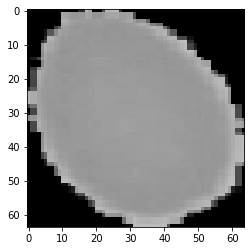

In [11]:
test_image1= image.load_img('cell_images/random1.png', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>= 0.5:
    prediction= 'Not infected'
else:
    prediction = 'Infected **'

print(prediction)
plt.imshow(test_image1)

In [10]:
import matplotlib.pyplot as plt

Infected **


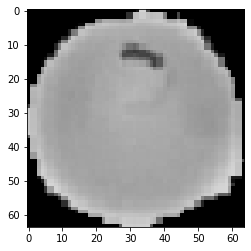

In [12]:
#test a new single image
test_image1= image.load_img('cell_images/random2.png', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>= 0.5:
    prediction= 'Not infected'
else:
    prediction = 'Infected **'

print(prediction)
plt.imshow(test_image1)